# SQL in Jupyter tutorial (part 3)
### How to visualize data from SQL query

Sometimes when analyzing data, it is useful to quickly visualize the data rather than just displaying it in the form of a table. Thanks to the fact that we use Jupyter, we have access to all Python functions and its libraries, such as pandas or matplotlib, which allow us to create a plot using only 2 lines of code.

Pandas and matplotlib libraries import.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Connecting to the databse.

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///data/test.db

'Connected: @test.db'

Displaying all tables in the 'test.db' database. 

In [4]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';

 * sqlite:///test.db
Done.


name
clients
transactions


For example, we want to check the top 10 categories where the largest payments were made.

In [5]:
%%sql
SELECT category, SUM(amount) AS total FROM transactions
GROUP BY category
ORDER BY total DESC
LIMIT 10
;

 * sqlite:///test.db
Done.


category,total
Beauty,15920
Music,15817
Toys,14721
Sports,14128
Industrial,13271
Movies,13134
Kids,12574
Tools,12489
Shoes,12389
Books,11882


To create a simple plot, all you need to do is convert the SQL query result to a pandas dataframe and then use the plot() function. Tip: you can use a backslash ``` \ ``` as a line continuation character.

In [13]:
# Storing results of the SQL query in the 'data' variable
data = %sql SELECT category, SUM(amount) AS total FROM transactions \
GROUP BY category \
ORDER BY total DESC \
LIMIT 10;

# Converting result of the query to the pandas DataFrame
data = data.DataFrame()

 * sqlite:///test.db
Done.


As you can see, the **data** variable is now a pandas DataFrame object.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  10 non-null     object
 1   total     10 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 288.0+ bytes


<AxesSubplot: xlabel='category'>

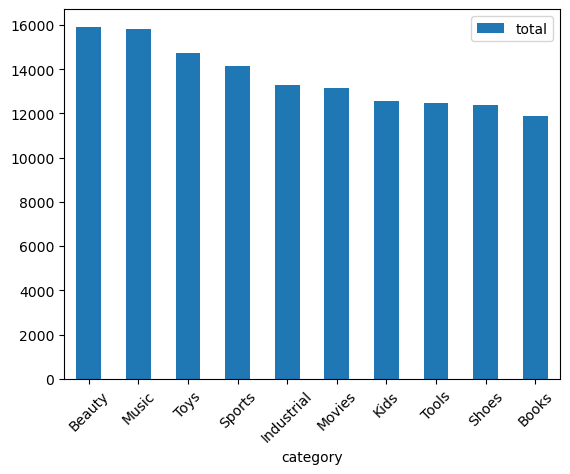

In [18]:
data.plot.bar(x='category', y='total', rot=45)

Instead of the plot() function in pandas, we can create plots in any other way using, for example, matplotib or seaborn libraries.